In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
employees = ['EA', 'KR', 'KB', 'CP', 'MM', 'MC']
targets = [65, 45, 85, 45, 85, 70]
months = ['Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov',
         'Dec', 'Jan', 'Feb', 'Mar']

In [4]:
df = pd.DataFrame(list(zip(employees, targets)), columns=['Employees', months[0]])
df.set_index('Employees', inplace=True)
df

,Apr
Employees,
EA,65
KR,45
KB,85
CP,45
MM,85
MC,70


In [5]:
for month in months[1:-5]:
    random_data = [random.randrange(60,140)/100 for employee in df.index]
    df[month] = df['Apr'] * random_data
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65,80.60,42.90,70.85,48.75,81.25,79.30
KR,45,54.00,32.40,55.80,47.70,61.65,42.75
KB,85,59.50,110.50,57.80,114.75,59.50,74.80
CP,45,32.85,54.00,39.15,47.70,49.05,46.80
MM,85,107.10,97.75,87.55,68.85,83.30,104.55
MC,70,58.80,46.90,93.80,67.20,43.40,68.60


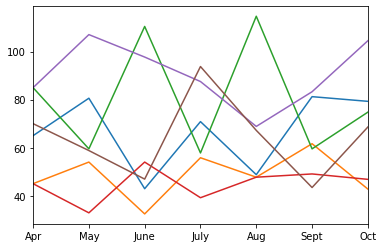

In [6]:
df.T.plot(legend=False)

In [7]:
habitat_avg = df.loc[['EA', 'KR', 'KB']].mean()
habitat_avg

Apr     65.000000
May     64.700000
June    61.933333
July    61.483333
Aug     70.400000
Sept    67.466667
Oct     65.616667
dtype: float64

In [8]:
df.loc['Habitat'] = habitat_avg.T
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.0,80.60,42.900000,70.850000,48.75,81.250000,79.300000
KR,45.0,54.00,32.400000,55.800000,47.70,61.650000,42.750000
KB,85.0,59.50,110.500000,57.800000,114.75,59.500000,74.800000
CP,45.0,32.85,54.000000,39.150000,47.70,49.050000,46.800000
MM,85.0,107.10,97.750000,87.550000,68.85,83.300000,104.550000
MC,70.0,58.80,46.900000,93.800000,67.20,43.400000,68.600000
Habitat,65.0,64.70,61.933333,61.483333,70.40,67.466667,65.616667


In [9]:
df.loc['Water'] = df.loc[['CP', 'MM', 'MC']].mean()
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.000000,80.60,42.900000,70.850000,48.75,81.250000,79.300000
KR,45.000000,54.00,32.400000,55.800000,47.70,61.650000,42.750000
KB,85.000000,59.50,110.500000,57.800000,114.75,59.500000,74.800000
CP,45.000000,32.85,54.000000,39.150000,47.70,49.050000,46.800000
MM,85.000000,107.10,97.750000,87.550000,68.85,83.300000,104.550000
MC,70.000000,58.80,46.900000,93.800000,67.20,43.400000,68.600000
Habitat,65.000000,64.70,61.933333,61.483333,70.40,67.466667,65.616667
Water,66.666667,66.25,66.216667,73.500000,61.25,58.583333,73.316667


In [10]:
#Projected Monthly Utilization = If in month, projected utilization, else actual utilization
projected = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
#Projected Yearly Utilization = weighted average of all utilization

In [11]:
projected

""
Employees
EA
KR
KB
CP
MM
MC
Habitat
Water


In [12]:
projected['Apr'] = df['Apr']
projected

,Apr
Employees,
EA,65.000000
KR,45.000000
KB,85.000000
CP,45.000000
MM,85.000000
MC,70.000000
Habitat,65.000000
Water,66.666667


In [13]:
df.mean(axis=1)

Employees
EA         66.950000
KR         48.471429
KB         80.264286
CP         44.935714
MM         90.585714
MC         64.100000
Habitat    65.228571
Water      66.540476
dtype: float64

In [14]:
df.iloc[:,-1]

Employees
EA          79.300000
KR          42.750000
KB          74.800000
CP          46.800000
MM         104.550000
MC          68.600000
Habitat     65.616667
Water       73.316667
Name: Oct, dtype: float64

In [15]:
for month in months:
    if month in df.columns:
        projected[month] = df[month]
    else:
        projected[month] = df.iloc[:,-1]
projected

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,80.60,42.900000,70.850000,48.75,81.250000,79.300000,79.300000,79.300000,79.300000,79.300000,79.300000
KR,45.000000,54.00,32.400000,55.800000,47.70,61.650000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000
KB,85.000000,59.50,110.500000,57.800000,114.75,59.500000,74.800000,74.800000,74.800000,74.800000,74.800000,74.800000
CP,45.000000,32.85,54.000000,39.150000,47.70,49.050000,46.800000,46.800000,46.800000,46.800000,46.800000,46.800000
MM,85.000000,107.10,97.750000,87.550000,68.85,83.300000,104.550000,104.550000,104.550000,104.550000,104.550000,104.550000
MC,70.000000,58.80,46.900000,93.800000,67.20,43.400000,68.600000,68.600000,68.600000,68.600000,68.600000,68.600000
Habitat,65.000000,64.70,61.933333,61.483333,70.40,67.466667,65.616667,65.616667,65.616667,65.616667,65.616667,65.616667
Water,66.666667,66.25,66.216667,73.500000,61.25,58.583333,73.316667,73.316667,73.316667,73.316667,73.316667,73.316667


In [16]:
projected.loc[:,'Apr': 'July']

,Apr,May,June,July
Employees,,,,
EA,65.000000,80.60,42.900000,70.850000
KR,45.000000,54.00,32.400000,55.800000
KB,85.000000,59.50,110.500000,57.800000
CP,45.000000,32.85,54.000000,39.150000
MM,85.000000,107.10,97.750000,87.550000
MC,70.000000,58.80,46.900000,93.800000
Habitat,65.000000,64.70,61.933333,61.483333
Water,66.666667,66.25,66.216667,73.500000


In [17]:
projected_y = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
for month in months:
    projected_y[month] = projected.loc[:,months[0]:month].mean(axis=1)
projected_y

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,72.800000,62.833333,64.837500,61.620000,64.891667,66.950000,68.493750,69.694444,70.655000,71.440909,72.095833
KR,45.000000,49.500000,43.800000,46.800000,46.980000,49.425000,48.471429,47.756250,47.200000,46.755000,46.390909,46.087500
KB,85.000000,72.250000,85.000000,78.200000,85.510000,81.175000,80.264286,79.581250,79.050000,78.625000,78.277273,77.987500
CP,45.000000,38.925000,43.950000,42.750000,43.740000,44.625000,44.935714,45.168750,45.350000,45.495000,45.613636,45.712500
MM,85.000000,96.050000,96.616667,94.350000,89.250000,88.258333,90.585714,92.331250,93.688889,94.775000,95.663636,96.404167
MC,70.000000,64.400000,58.566667,67.375000,67.340000,63.350000,64.100000,64.662500,65.100000,65.450000,65.736364,65.975000
Habitat,65.000000,64.850000,63.877778,63.279167,64.703333,65.163889,65.228571,65.277083,65.314815,65.345000,65.369697,65.390278
Water,66.666667,66.458333,66.377778,68.158333,66.776667,65.411111,66.540476,67.387500,68.046296,68.573333,69.004545,69.363889


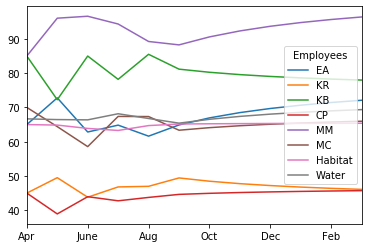

In [18]:
projected_y.T.plot()

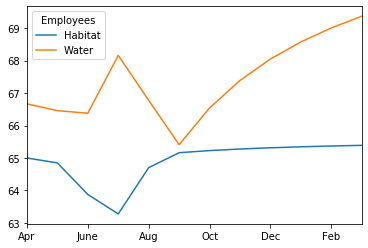

In [19]:
projected_y.loc[['Habitat', 'Water'],:].T.plot()

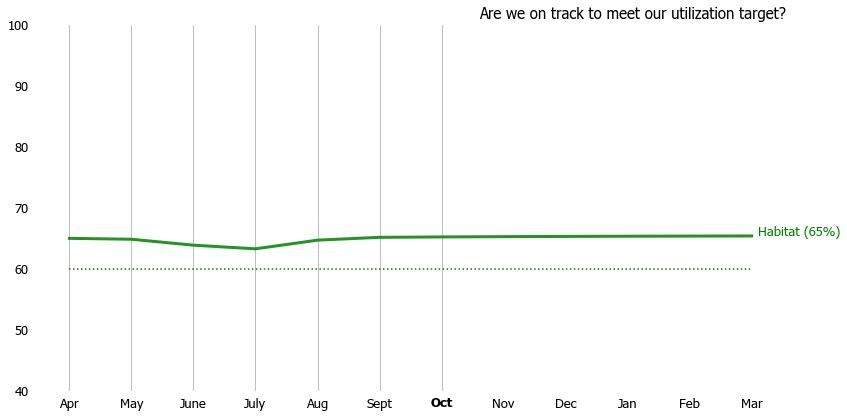

In [20]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
# ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
# ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, zorder=10)
# ax.bar(np.arange(12), habitat_max, width=.05, color='green', alpha=.2)
# ax.bar(np.arange(12), habitat_min, color='white')

# water_min = data[['CP','MM','MC']].min(axis=1)
# water_max = data[['CP','MM','MC']].max(axis=1)
# ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
# ax.plot([water_target]*12, color=water_color, linestyle='dotted')

# ax.plot(data[['EA','KR','KB']], linestyle='', marker='_', color='green', alpha=.6)

# ax.axvline(6, color='grey', alpha=.4, linewidth=3)

# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(40, 100)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.xaxis.grid(True)

# Axes ticks
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
# plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color,
#         fontsize=12)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

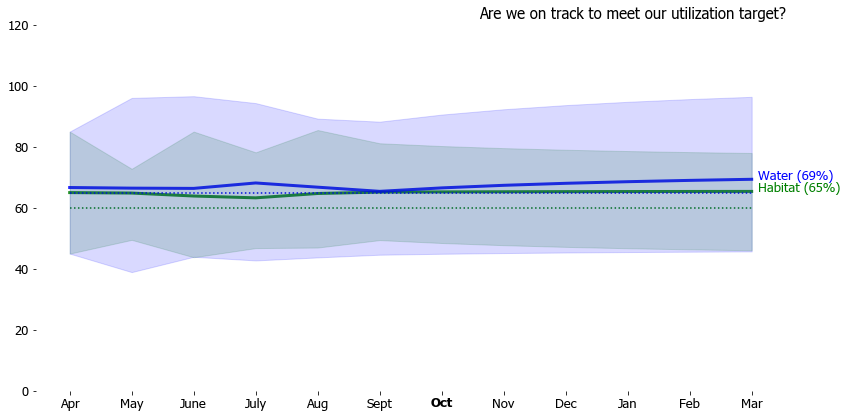

In [21]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, 
                zorder=10)

water_min = data[['CP','MM','MC']].min(axis=1)
water_max = data[['CP','MM','MC']].max(axis=1)
ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15,
               zorder=10)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax.plot([water_target]*12, color=water_color, linestyle='dotted')


# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(0,120)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

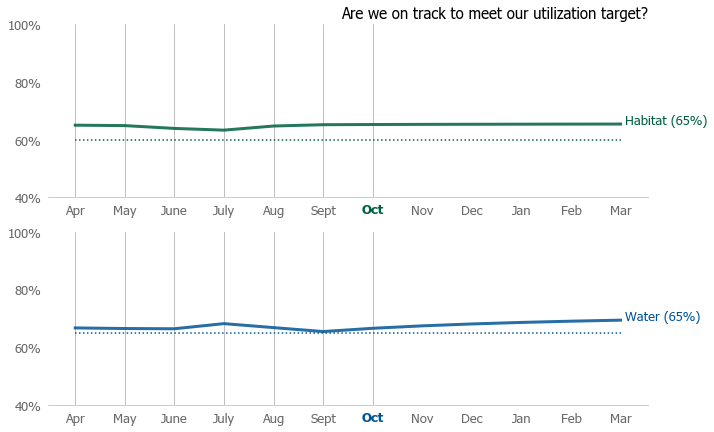

In [84]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6

water_color= '#005595'
habitat_color= '#006040'
water_target = 65
habitat_target = 60

fig, axes = plt.subplots(2,1,figsize=[10.75,7])
ax1 = axes[0]
ax2 = axes[1]

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax1.axes.axvline(i, color='white', linewidth=2)
    ax2.axes.axvline(i, color='white', linewidth=2)

# Plot data
ax1.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax2.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)

# Plot targets
ax1.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax2.plot([water_target]*12, color=water_color, linestyle='dotted')

# Set title
ax1.set_title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Adjust axes ranges
ax1.set_ylim(40, 100)
ax2.set_ylim(40, 100)

# Adjust number of labels
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))

# Format labels as percent
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Add grid Lines
ax1.yaxis.grid(False)
ax1.xaxis.grid(True)
ax2.yaxis.grid(False)
ax2.xaxis.grid(True)

# Customize grid lines
ax1.axes.grid(axis='x', linestyle='-')
ax2.axes.grid(axis='x', linestyle='-')

# Set below graph objects
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

# Remove Axes ticks
ax1.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax2.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Recolor axis labels
ax1.tick_params(colors='dimgrey')
ax2.tick_params(colors='dimgrey')

# Remove axes spines
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_color('silver')

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['bottom'].set_color('silver')

# Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
ax1.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
ax2.text(11.1, water_value, f'Water ({int(habitat_value)}%)', color=water_color)

# Indicate current month
ax1.get_xticklabels()[current_month].set_fontweight('bold')
ax1.get_xticklabels()[current_month].set_color(habitat_color) #Black draws too much attention as new color
ax2.get_xticklabels()[current_month].set_fontweight('bold')
ax2.get_xticklabels()[current_month].set_color(water_color)

plt.show()

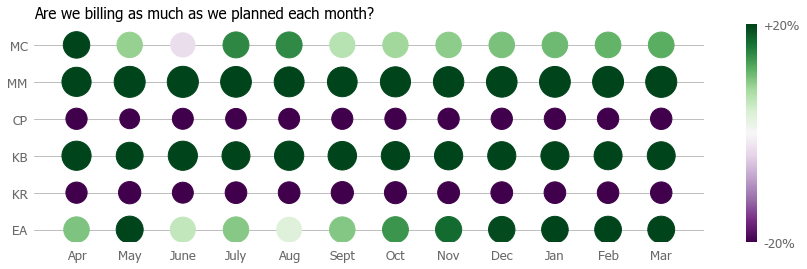

In [79]:
fig, ax3 = plt.subplots(figsize=[15,4])

ax3.set_title('Are we billing as much as we planned each month?', loc='left', fontsize=15)

# colorbar = ax3.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
# norm = colors.Normalize()
cmap_code = 'PRGn'
norm = plt.Normalize(vmin=50, vmax=70)

for idx, emp in enumerate(employees):
    x = data.index
    y = [idx] * len(data.index)
    size = data[emp]
    color = data[emp] # Set to calculated array of actual minus planned
    ax3.scatter(x, y, s=size*10, c=color, cmap=cmap_code, norm=norm)
#     ax3.scatter(x, y, s=size*10, c=color, cmap='PRGn', vmin=50, vmax=70)
#     ax.scatter(x, y, s=size, facecolors='none', edgecolors='blue')

ax3.set_yticklabels([''] + employees + [''])  # top and bottom ticks are blank

ax3.yaxis.grid(True)
ax3.set_axisbelow(True)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax3.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# ax3.tick_params(axis='x', pad=30)

# Recolor axis labels
ax3.tick_params(colors='dimgrey')

# fig.colorbar(ax=ax3)
cmap = plt.cm.ScalarMappable(cmap=cmap_code, norm=norm)
cbar = plt.colorbar(cmap, ax=ax3, ticks=[50,70])
# cbar.set_label('% Utilization Over/Under Planned Utilization', color='dimgrey')
cbar.outline.set_edgecolor('none')
cbar.ax.yaxis.set_tick_params(color='none')
cbar.ax.set_yticklabels(['-20%', '+20%'])
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='dimgrey')


plt.show()

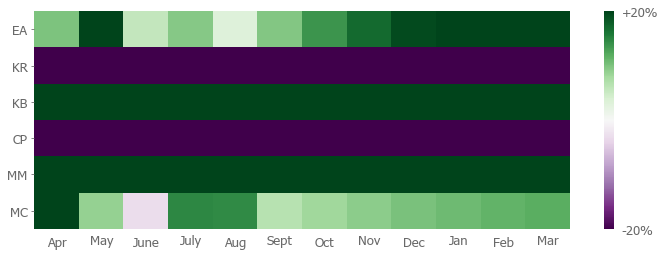

In [75]:
data = projected_y[:-2].T

fig, ax4 = plt.subplots(figsize=[12,4])

cmap_code = 'PRGn'
norm = plt.Normalize(vmin=50, vmax=70)

ax4.imshow(data.T, cmap=cmap_code, norm=norm, aspect='auto')

ax4.set_yticklabels([''] + employees + [''])  # top and bottom ticks are blank

ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

ax4.tick_params(axis='x', which='both', bottom=False, top=False)

ax4.xaxis.set_minor_locator(plt.MaxNLocator(12))

# Recolor axis labels
ax4.tick_params(colors='dimgrey', which='both')

ax4.set_xticklabels([''] + list(data.index[::2]), minor=False)
ax4.set_xticklabels([''] + list(data.index[1::2]), minor=True)

cmap = plt.cm.ScalarMappable(cmap=cmap_code, norm=norm)
cbar = plt.colorbar(cmap, ax=ax4, ticks=[50,70])
# cbar.set_label('% Utilization Over/Under Planned Utilization', color='dimgrey')
cbar.outline.set_edgecolor('none')
cbar.ax.yaxis.set_tick_params(color='none')
cbar.ax.set_yticklabels(['-20%', '+20%'])
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='dimgrey')

plt.show()

In [59]:
import xml.etree.ElementTree as et
import pandas as pd

def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element.
    https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [65]:
df = pd.read_csv('../Billable Hours Report 2019-12-09.csv')
project_class_table = pd.read_csv('../project-classification.csv')

In [81]:
employees = list(set(df['User Name']))
employee_initials = [employee.split(',')[1][1:3] + employee.split(',')[0][0] for employee in employees]
employee_initials

['KrB',
 'GeU',
 'CaH',
 'ChP',
 'MoA',
 'TiG',
 'BrA',
 'PaN',
 'KaR',
 'NaC',
 'ErA',
 'KeS',
 'LeH',
 'AmG',
 'JeB',
 'StH',
 'MaA',
 'KaF',
 'MeC',
 'SuH',
 'TeP',
 'EoD',
 'ArS',
 'KeE',
 'JaM',
 'ClP',
 'MiW',
 'MaM',
 'ShP',
 'JuM',
 'TeG',
 'ChC',
 'AnA',
 'SaG',
 'CaC',
 'ReG',
 'JeS',
 'ElS',
 'ShH',
 'LiL',
 'EiG',
 'CaB',
 'LeO',
 'MaC',
 'NaD']